<a href="https://colab.research.google.com/github/arishma108/QuantumComputing/blob/master/IBM%20Quantum%20Challenge%202024/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Install Qiskit and relevant packages, if needed

%pip install qiskit[visualization]==1.0.2
%pip install qiskit_ibm_runtime
%pip install qiskit_aer
%pip install prototype-zne
%pip install graphviz
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
%pip install qiskit-transpiler-service

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=60684eb551a17ea87814e69f9862aee16805abf99093e497bd07348bf272a544
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
### Save API Token, if needed

%set_env QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


In [3]:
# qc-grader should be 0.18.10 (or higher)
import qc_grader

qc_grader.__version__

'0.18.10'

In [4]:
# Imports

import numpy as np
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [5]:
# Import for grader
from qc_grader.challenges.iqc_2024 import grade_lab3_ait_ex1, grade_lab3_ait_ex2

In [6]:

NUM_QUBITS = 61

Original circuit -> Depth: 63, CNOTs: 61


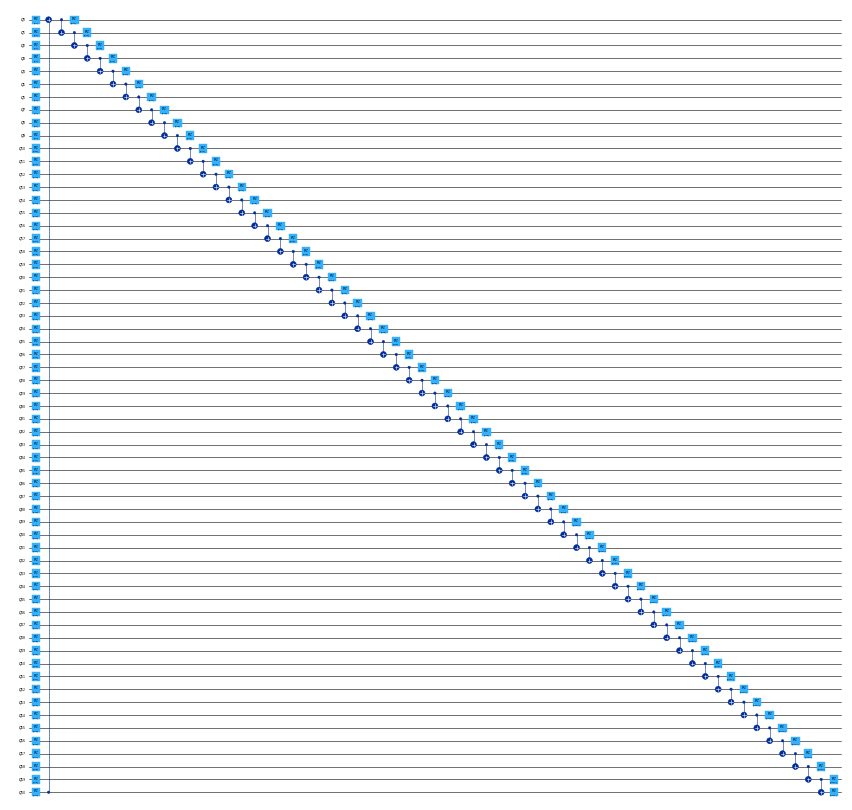

In [7]:
circuit = EfficientSU2(NUM_QUBITS, su2_gates="rz", entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

In [14]:

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86",
    set_as_default=True,
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()


transpiler_ai_false = TranspilerService(
    # Add your code here
    backend_name="ibm_brisbane",
    ai=False,
    optimization_level=3,
)

In [15]:
grade_lab3_ait_ex1(transpiler_ai_false)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [16]:
circuit_ai_false = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled without AI -> Depth: 1326, CNOTs: 355


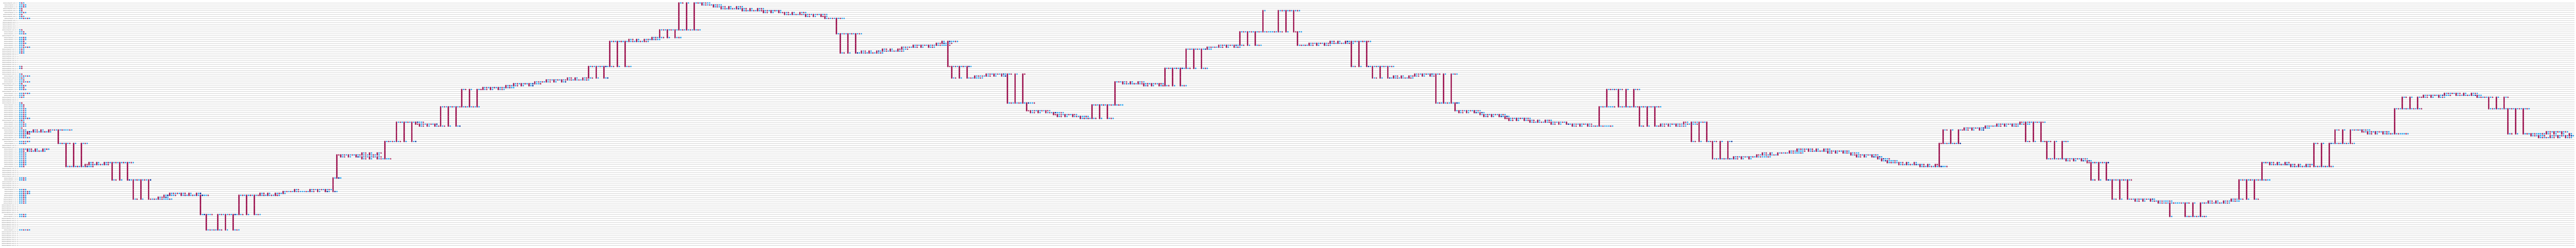

In [17]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

In [18]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [23]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])


NameError: name 'plt' is not defined

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

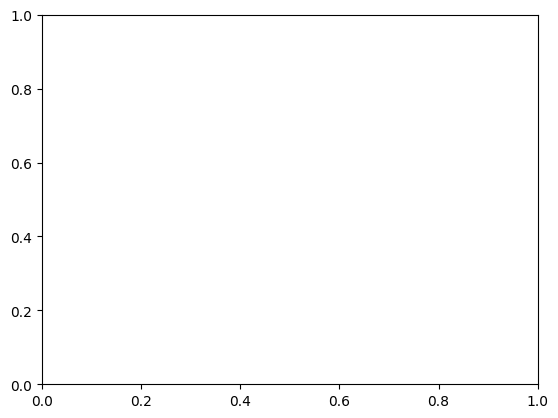

In [24]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])

In [25]:
### Install Qiskit and relevant packages, if needed

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_ibm_runtime
!pip install qiskit_aer
!pip install graphviz
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
!pip install qiskit-code-assistant-jupyterlab

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-znee6f5d
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-znee6f5d
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit cdaecf0af5ffb66e38afc655395708d43d1d4e3a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Succes

In [26]:
### Save API Token, if needed

%set_env QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


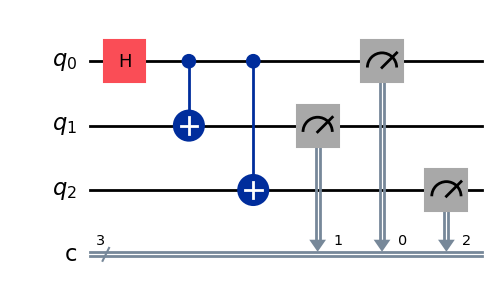

In [27]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply CNOT gates
qc.cx(0, 1)
qc.cx(0, 2)

# Measure the qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Draw the circuit
qc.draw('mpl')

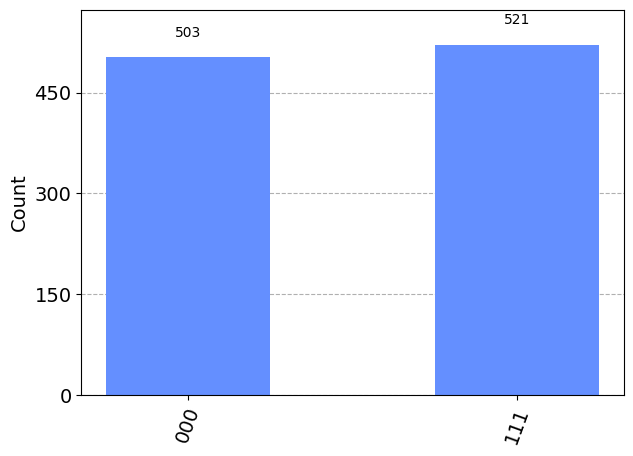

In [28]:
backend=AerSimulator(method='statevector')
job = transpile(qc, backend)
# Run and get counts
result = backend.run(job).result()
counts = result.get_counts(qc)
plot_histogram(counts)

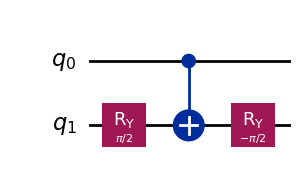

In [29]:
from qiskit import QuantumCircuit

def ch(qc, ctrl, target):
  """
  Applies a Controlled Hadamard (CH) gate to the given qubits.

  Args:
      qc (QuantumCircuit): The quantum circuit to add the gate.
      ctrl (int): The control qubit index.
      target (int): The target qubit index.
  """
  # Apply an RY gate with angle pi/2 to the target qubit
  qc.ry(np.pi/2, target)

  # Apply a CNOT gate with control and target qubits
  qc.cx(ctrl, target)

  # Apply another RY gate with angle -pi/2 to the target qubit
  qc.ry(-np.pi/2, target)

# Example usage
qc = QuantumCircuit(2)
ch(qc, 0, 1)
qc.draw('mpl')  # View the circuit diagram

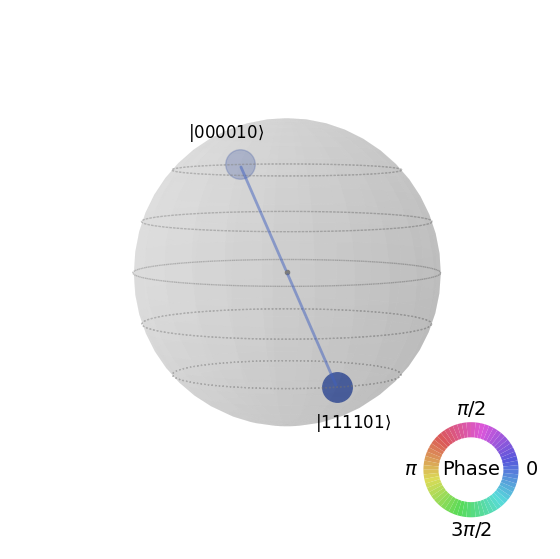

In [30]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

state = [0] * 64  # Initialize with all zeros
state[2] = 1  # Set amplitude for basis state |010000>
state[61] = 1  # Set amplitude for basis state |111101>

# Create a quantum circuit (circuit doesn't directly replicate logo creation)
qc = QuantumCircuit(6)

# You can modify this part to explore different gate combinations
# This example applies Hadamard (H) to qubit 0 and CNOT (CX) gates for entanglement
qc.h(0)
for i in range(5):
  qc.cx(0, i+1)
qc.x(1)

# Visualize the statevector as a q-sphere
plot_state_qsphere(state, show_state_labels=True)